In [137]:

from pathlib import Path
import pandas as pd

datapath = Path("..") / "datasets" / "lifesat"
lifesat = pd.read_csv(datapath / "lifesat.csv")



In [138]:
gdp_year = 2020
gdppc_col = "GDP per capita (USD)"

gdp_per_capita = pd.read_csv(datapath / "gdp_per_capita.csv")
gdp_per_capita = gdp_per_capita[gdp_per_capita["Year"] == gdp_year]
gdp_per_capita = gdp_per_capita.drop(["Code" ], axis=1)
gdp_per_capita.columns = ["Country","Year", gdppc_col]
gdp_per_capita.set_index("Country", inplace=True)


gdp_per_capita.head()
# gdp_per_capita[["Year",gdppc_col]].loc["Cyprus"]

,Year,GDP per capita (USD)
Country,,
Afghanistan,2020,1978.961579
Africa Eastern and Southern,2020,3387.594670
Africa Western and Central,2020,4003.158913
Albania,2020,13295.410885
Algeria,2020,10681.679297


In [139]:

oecd_bli = pd.read_csv(datapath / "oecd_bli.csv")
oecd_bli = oecd_bli[oecd_bli["INEQUALITY"] == "TOT"]
oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value" )

lifesat_col = "Life satisfaction"
oecd_bli = oecd_bli[[lifesat_col]]
oecd_bli.tail(20)
# print(oecd_bli.loc("Cyprus"))

Indicator,Life satisfaction
Country,
Latvia,5.9
Lithuania,5.9
Luxembourg,6.9
Mexico,6.5
Netherlands,7.4
New Zealand,7.3
Norway,7.6
OECD - Total,6.5
Poland,6.1


In [140]:
lifesat_col = "Life satisfaction"
country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                              left_index=True, right_index=True)
country_stats.sort_values(by=gdppc_col, inplace=True)
country_stats = country_stats[[gdppc_col, lifesat_col]]

country_stats.to_csv(datapath / "country_stats.csv")


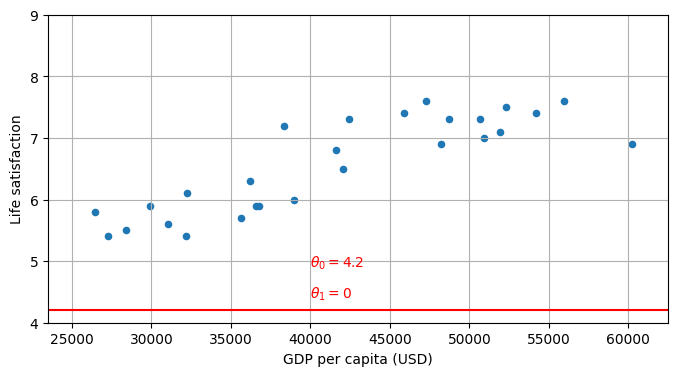

In [144]:
min_gdp = 23_500
max_gdp = 62_500
min_life_sat = 4
max_life_sat = 9

import matplotlib.pyplot as plt
import numpy as np

country_stats = country_stats[(country_stats[gdppc_col] >= min_gdp) &
                                   (country_stats[gdppc_col] <= max_gdp)]
country_stats.plot(kind='scatter', figsize=(8, 4), grid=True,
                   x=gdppc_col, y=lifesat_col )
plt.axis([min_gdp, max_gdp, min_life_sat, max_life_sat])


def render_country_name():
    for idx,row in country_stats.iterrows():
        pos_data_x = row[gdppc_col]
        pos_data_y = row[lifesat_col]
        pos_text = (pos_data_x - 1000, pos_data_y - 1)
        plt.annotate(idx, xy=(pos_data_x, pos_data_y),
                     xytext=pos_text, fontsize=10,
                     arrowprops=dict(facecolor='black', width=0.5,
                                     shrink=0.08, headwidth=2))
        plt.plot(pos_data_x, pos_data_y, "rx")


X = np.linspace(min_gdp, max_gdp, 1000)

w1, w2 = 4.2, 0
plt.plot(X, w1 + w2 * 1e-5 * X, "r")
plt.text(40_000, 4.9, fr"$\theta_0 = {w1}$", color="r")
plt.text(40_000, 4.4, fr"$\theta_1 = {w2}$", color="r")
       
plt.show()